# Exploratory Data Analysis (EDA)

## Import Library

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import matplotlib.ticker as mtick
import matplotlib as mpl

from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline as imbl_pipe
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import *

In [2]:
pip install imbalanced

ERROR: Could not find a version that satisfies the requirement imbalanced (from versions: none)
ERROR: No matching distribution found for imbalanced


## Read Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
app_train = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/application_train.csv")
app_test = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/application_test.csv")
bureau = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau.csv")
bureau_balance = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/bureau_balance.csv")
credit_card_balance = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/credit_card_balance.csv")
installments_payments = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/installments_payments.csv")
previous_application = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/previous_application.csv")
POS_CASH_balance = pd.read_csv("/content/drive/MyDrive/home-credit-default-risk/POS_CASH_balance.csv")

## Menampilkan 5 data teratas dan terbawah

In [5]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
app_train.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Cek data duplikat

In [8]:
app_train.duplicated().sum()

0

## Memilih Variabel Pemodelan

In [9]:
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [10]:
app_train_pakai=app_train[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

app_test_pakai=app_test[['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'CNT_FAM_MEMBERS']]

## Missing Value

In [11]:
data_missing_value = app_train_pakai.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(app_train_pakai))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,NAME_TYPE_SUITE,1292,0.42
1,AMT_GOODS_PRICE,278,0.09


In [12]:
data_missing_value = app_test_pakai.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(app_test_pakai))*100,2)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,NAME_TYPE_SUITE,911,1.87
1,AMT_ANNUITY,24,0.05


## Handling Missing Value

In [13]:
train_pakai = app_train_pakai.dropna()
test_pakai = app_test_pakai.dropna()

In [14]:
train_pakai.isnull().sum()

TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
dtype: int64

In [15]:
test_pakai.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
CNT_CHILDREN                  0
AMT_INCOME_TOTAL              0
AMT_CREDIT                    0
AMT_ANNUITY                   0
AMT_GOODS_PRICE               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
REGION_POPULATION_RELATIVE    0
DAYS_BIRTH                    0
CNT_FAM_MEMBERS               0
dtype: int64

In [16]:
# Jumlah baris dan kolom
print(len(train_pakai), len(test_pakai))

306207 47809


## Memeriksa word spelling

In [17]:
train_pakai.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 306207 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      306207 non-null  int64  
 1   NAME_CONTRACT_TYPE          306207 non-null  object 
 2   CODE_GENDER                 306207 non-null  object 
 3   FLAG_OWN_CAR                306207 non-null  object 
 4   FLAG_OWN_REALTY             306207 non-null  object 
 5   CNT_CHILDREN                306207 non-null  int64  
 6   AMT_INCOME_TOTAL            306207 non-null  float64
 7   AMT_CREDIT                  306207 non-null  float64
 8   AMT_ANNUITY                 306207 non-null  float64
 9   AMT_GOODS_PRICE             306207 non-null  float64
 10  NAME_TYPE_SUITE             306207 non-null  object 
 11  NAME_INCOME_TYPE            306207 non-null  object 
 12  NAME_EDUCATION_TYPE         306207 non-null  object 
 13  NAME_FAMILY_ST

In [18]:
print(train_pakai['TARGET'].unique(),'\n',
    train_pakai['NAME_CONTRACT_TYPE'].unique(),'\n',
      train_pakai['CODE_GENDER'].unique(),'\n',
      train_pakai['FLAG_OWN_CAR'].unique(),'\n',
      train_pakai['FLAG_OWN_REALTY'].unique(),'\n',
      train_pakai['NAME_TYPE_SUITE'].unique(),'\n',
      train_pakai['NAME_INCOME_TYPE'].unique(),'\n',
      train_pakai['NAME_EDUCATION_TYPE'].unique(),'\n',
      train_pakai['NAME_FAMILY_STATUS'].unique(),'\n',
      train_pakai['NAME_HOUSING_TYPE'].unique())

[1 0] 
 ['Cash loans' 'Revolving loans'] 
 ['M' 'F' 'XNA'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' 'Other_B'
 'Group of people'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave'] 
 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [19]:
print(test_pakai['NAME_CONTRACT_TYPE'].unique(),'\n',
      test_pakai['CODE_GENDER'].unique(),'\n',
      test_pakai['FLAG_OWN_CAR'].unique(),'\n',
      test_pakai['FLAG_OWN_REALTY'].unique(),'\n',
      test_pakai['NAME_TYPE_SUITE'].unique(),'\n',
      test_pakai['NAME_INCOME_TYPE'].unique(),'\n',
      test_pakai['NAME_EDUCATION_TYPE'].unique(),'\n',
      test_pakai['NAME_FAMILY_STATUS'].unique(),'\n',
      test_pakai['NAME_HOUSING_TYPE'].unique())

['Cash loans' 'Revolving loans'] 
 ['F' 'M'] 
 ['N' 'Y'] 
 ['Y' 'N'] 
 ['Unaccompanied' 'Family' 'Spouse, partner' 'Group of people' 'Other_B'
 'Children' 'Other_A'] 
 ['Working' 'State servant' 'Pensioner' 'Commercial associate'
 'Businessman' 'Student' 'Unemployed'] 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree'] 
 ['Married' 'Single / not married' 'Civil marriage' 'Widow' 'Separated'] 
 ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']


In [20]:
train_pakai.drop(train_pakai.index[train_pakai['CODE_GENDER']=='XNA'],inplace=True)
train_pakai.drop(train_pakai.index[train_pakai['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)

<ipython-input-20-86b915ebd2da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pakai.drop(train_pakai.index[train_pakai['CODE_GENDER']=='XNA'],inplace=True)
<ipython-input-20-86b915ebd2da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_pakai.drop(train_pakai.index[train_pakai['NAME_INCOME_TYPE']=='Maternity leave'],inplace=True)


In [21]:
print(train_pakai['CODE_GENDER'].unique(),'\n',
     train_pakai['NAME_INCOME_TYPE'].unique())

['M' 'F'] 
 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman']


In [22]:
# Jumlah baris dan kolom
print(len(train_pakai), len(test_pakai))

306198 47809


## Descriptive Statistic

In [23]:
train_pakai.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,CNT_FAM_MEMBERS
count,306198.000000,306198.000000,3.061980e+05,3.061980e+05,306198.000000,3.061980e+05,306198.000000,306198.000000,306198.000000
mean,0.080840,0.417005,1.687827e+05,5.987985e+05,27122.049395,5.379456e+05,0.020865,-16040.713287,2.152774
std,0.272589,0.722101,2.375236e+05,4.019622e+05,14490.656610,3.689191e+05,0.013830,4362.868768,0.910582
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,1.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16551.000000,2.385000e+05,0.010006,-19685.000000,2.000000
50%,0.000000,0.000000,1.476000e+05,5.135310e+05,24930.000000,4.500000e+05,0.018850,-15756.000000,2.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12418.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,20.000000


array([[<Axes: title={'center': 'TARGET'}>,
        <Axes: title={'center': 'CNT_CHILDREN'}>,
        <Axes: title={'center': 'AMT_INCOME_TOTAL'}>],
       [<Axes: title={'center': 'AMT_CREDIT'}>,
        <Axes: title={'center': 'AMT_ANNUITY'}>,
        <Axes: title={'center': 'AMT_GOODS_PRICE'}>],
       [<Axes: title={'center': 'REGION_POPULATION_RELATIVE'}>,
        <Axes: title={'center': 'DAYS_BIRTH'}>,
        <Axes: title={'center': 'CNT_FAM_MEMBERS'}>]], dtype=object)

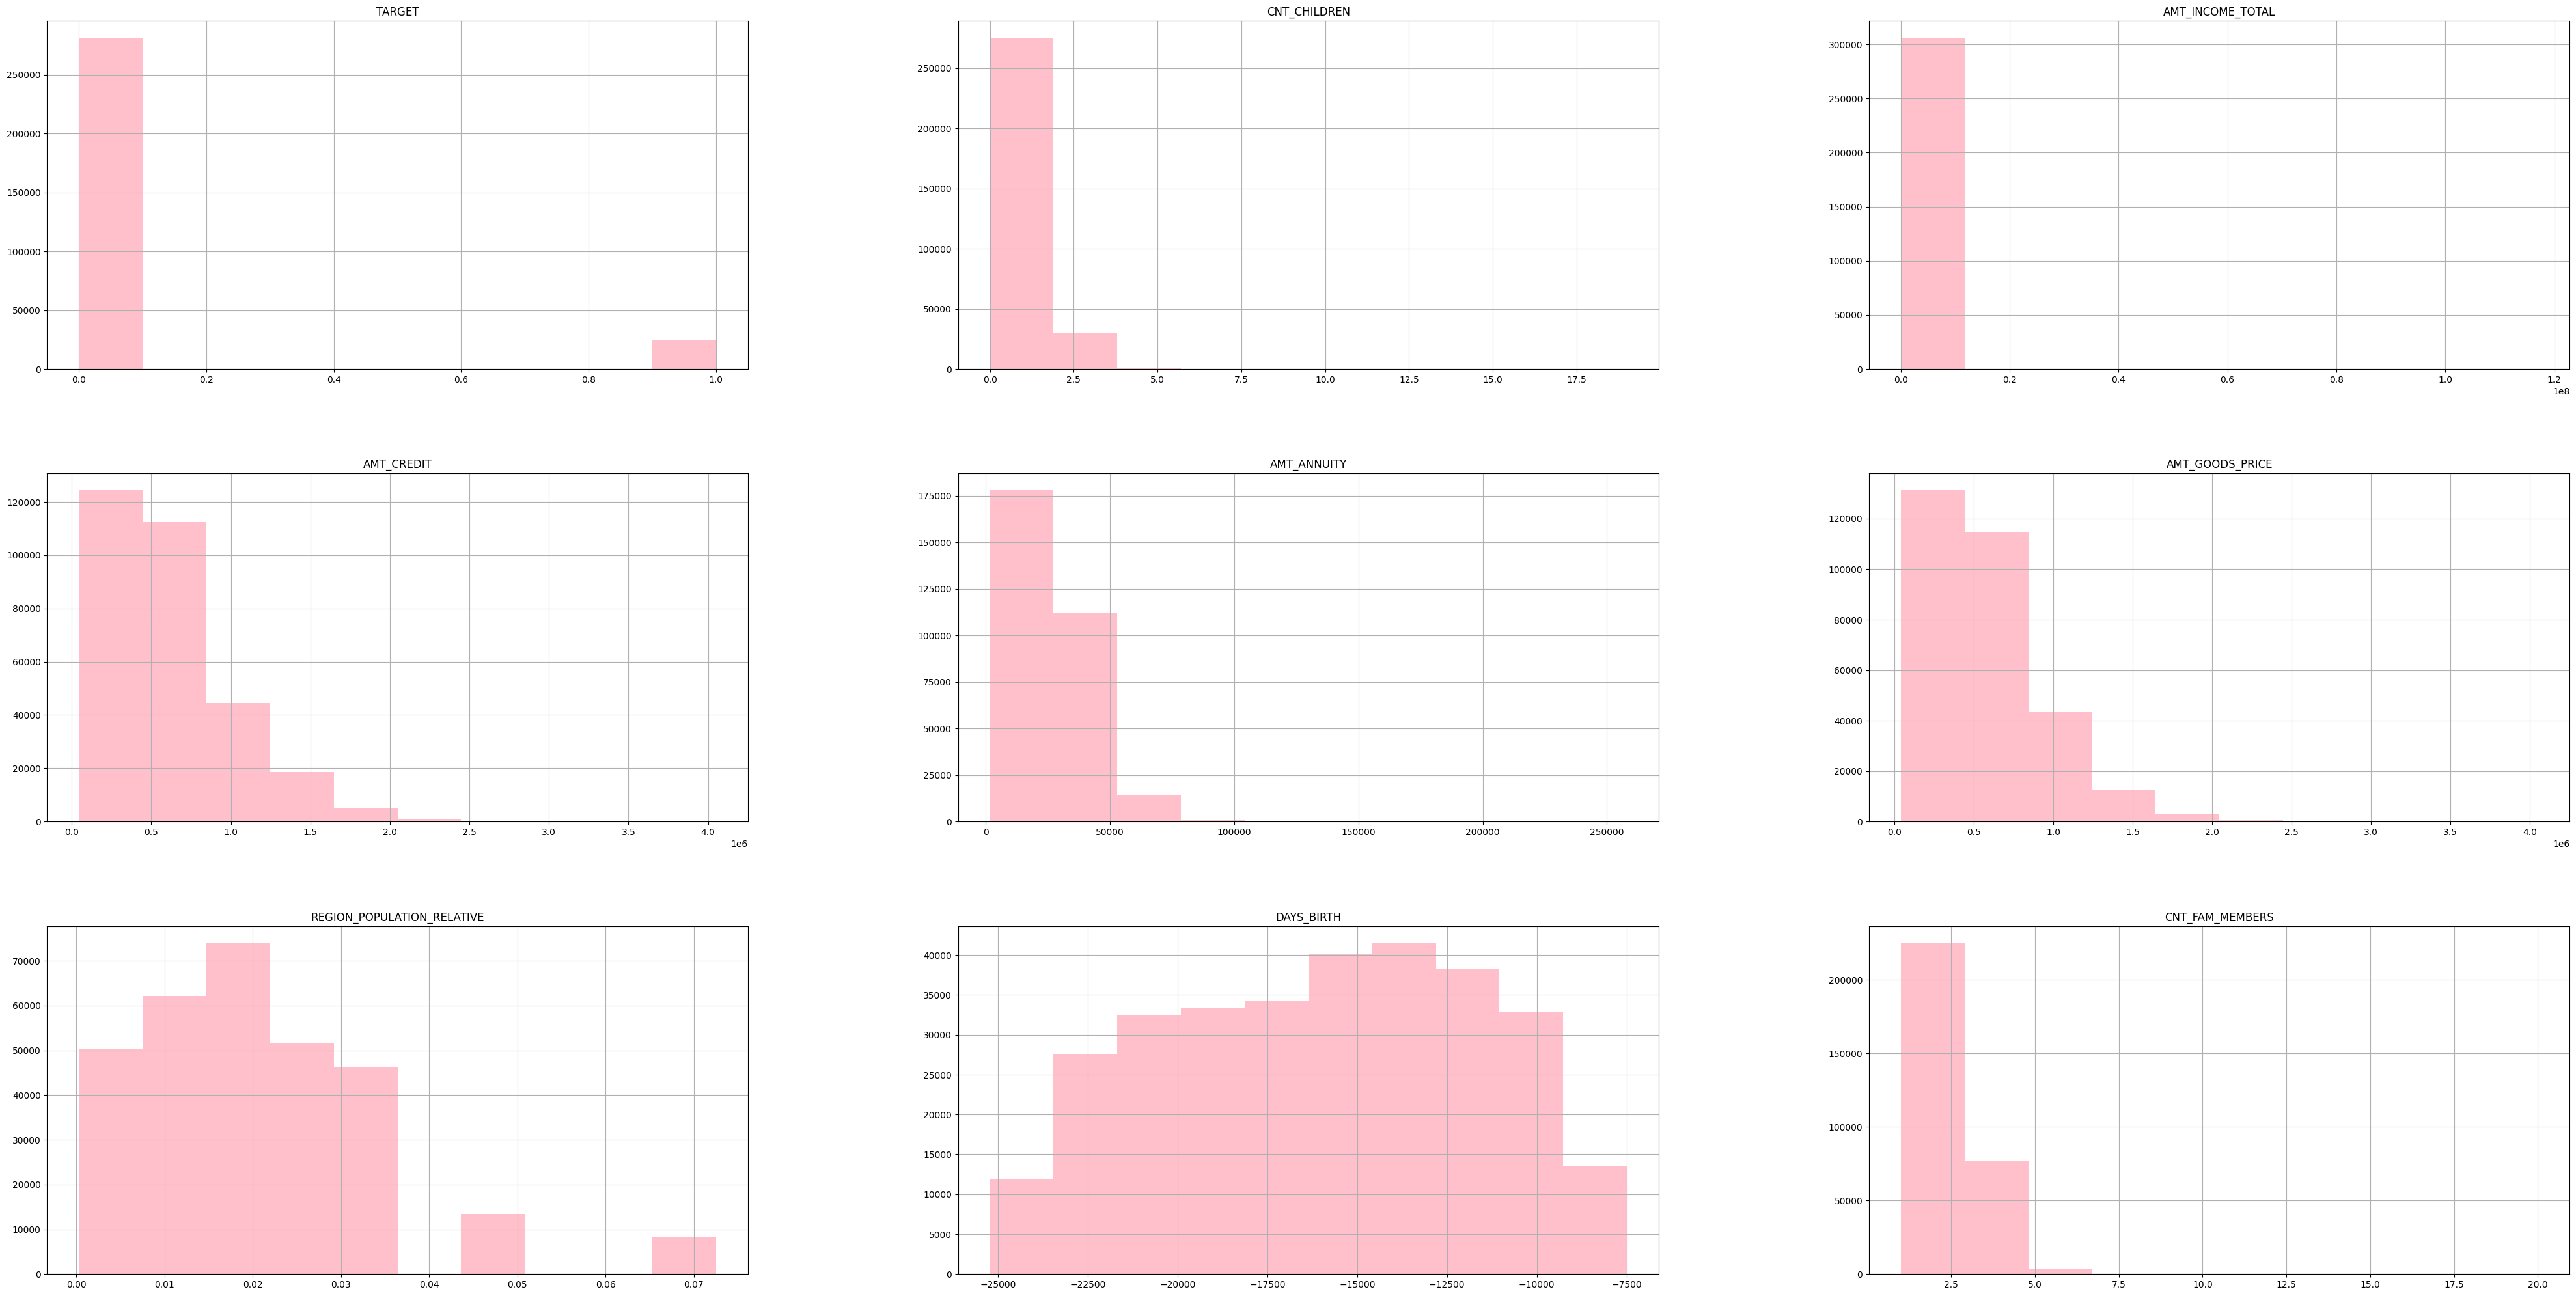

In [24]:
# Histogram
train_pakai.hist(figsize=(50,25),color='pink')

## Proporsi Fitur Target

> 1: klien mengalami kesulitan pembayaran

> 0: pinjaman dilunasi tepat waktu

In [25]:
train_pakai.TARGET.value_counts()

0    281445
1     24753
Name: TARGET, dtype: int64

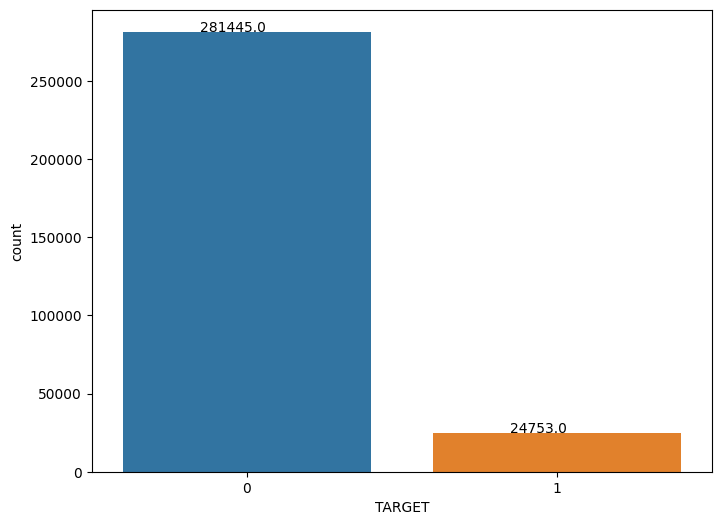

In [26]:

plt.figure(figsize=(8,6))
ax = sns.countplot(data = train_pakai, x = 'TARGET', order=train_pakai['TARGET'].value_counts(ascending=False).index)

# Add annotations to the plot
for p in ax.patches:
    ax.annotate('{:}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

plt.show()

## Informasi Clients

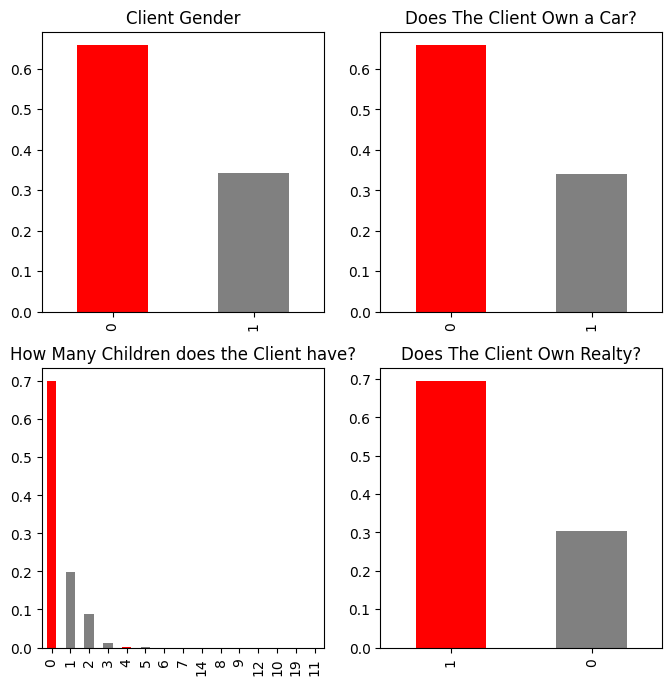

In [65]:
plt.figure(1)
plt.subplot(221)
train_pakai['CODE_GENDER'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Client Gender', color=['red','grey'])
plt.subplot(222)
train_pakai['FLAG_OWN_CAR'].value_counts(normalize=True).plot.bar(title= 'Does The Client Own a Car?', color=['red','grey'])
plt.subplot(223)
train_pakai['CNT_CHILDREN'].value_counts(normalize=True).plot.bar(title= 'How Many Children does the Client have?', color=['red','grey','grey','grey'])
plt.subplot(224)
train_pakai['FLAG_OWN_REALTY'].value_counts(normalize=True).plot.bar(figsize=(8,8), title= 'Does The Client Own Realty?', color=['red','grey'])

plt.show()

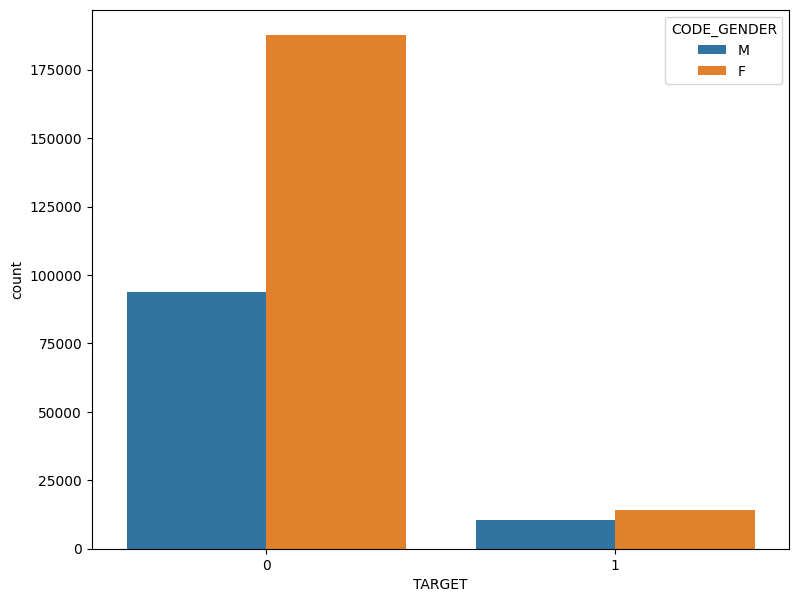

In [28]:
plt.figure(figsize=(9, 7))  # Set the desired figure size

sns.countplot(x=train_pakai['TARGET'], hue=train_pakai['CODE_GENDER'])

plt.show()


<Axes: xlabel='TARGET', ylabel='count'>

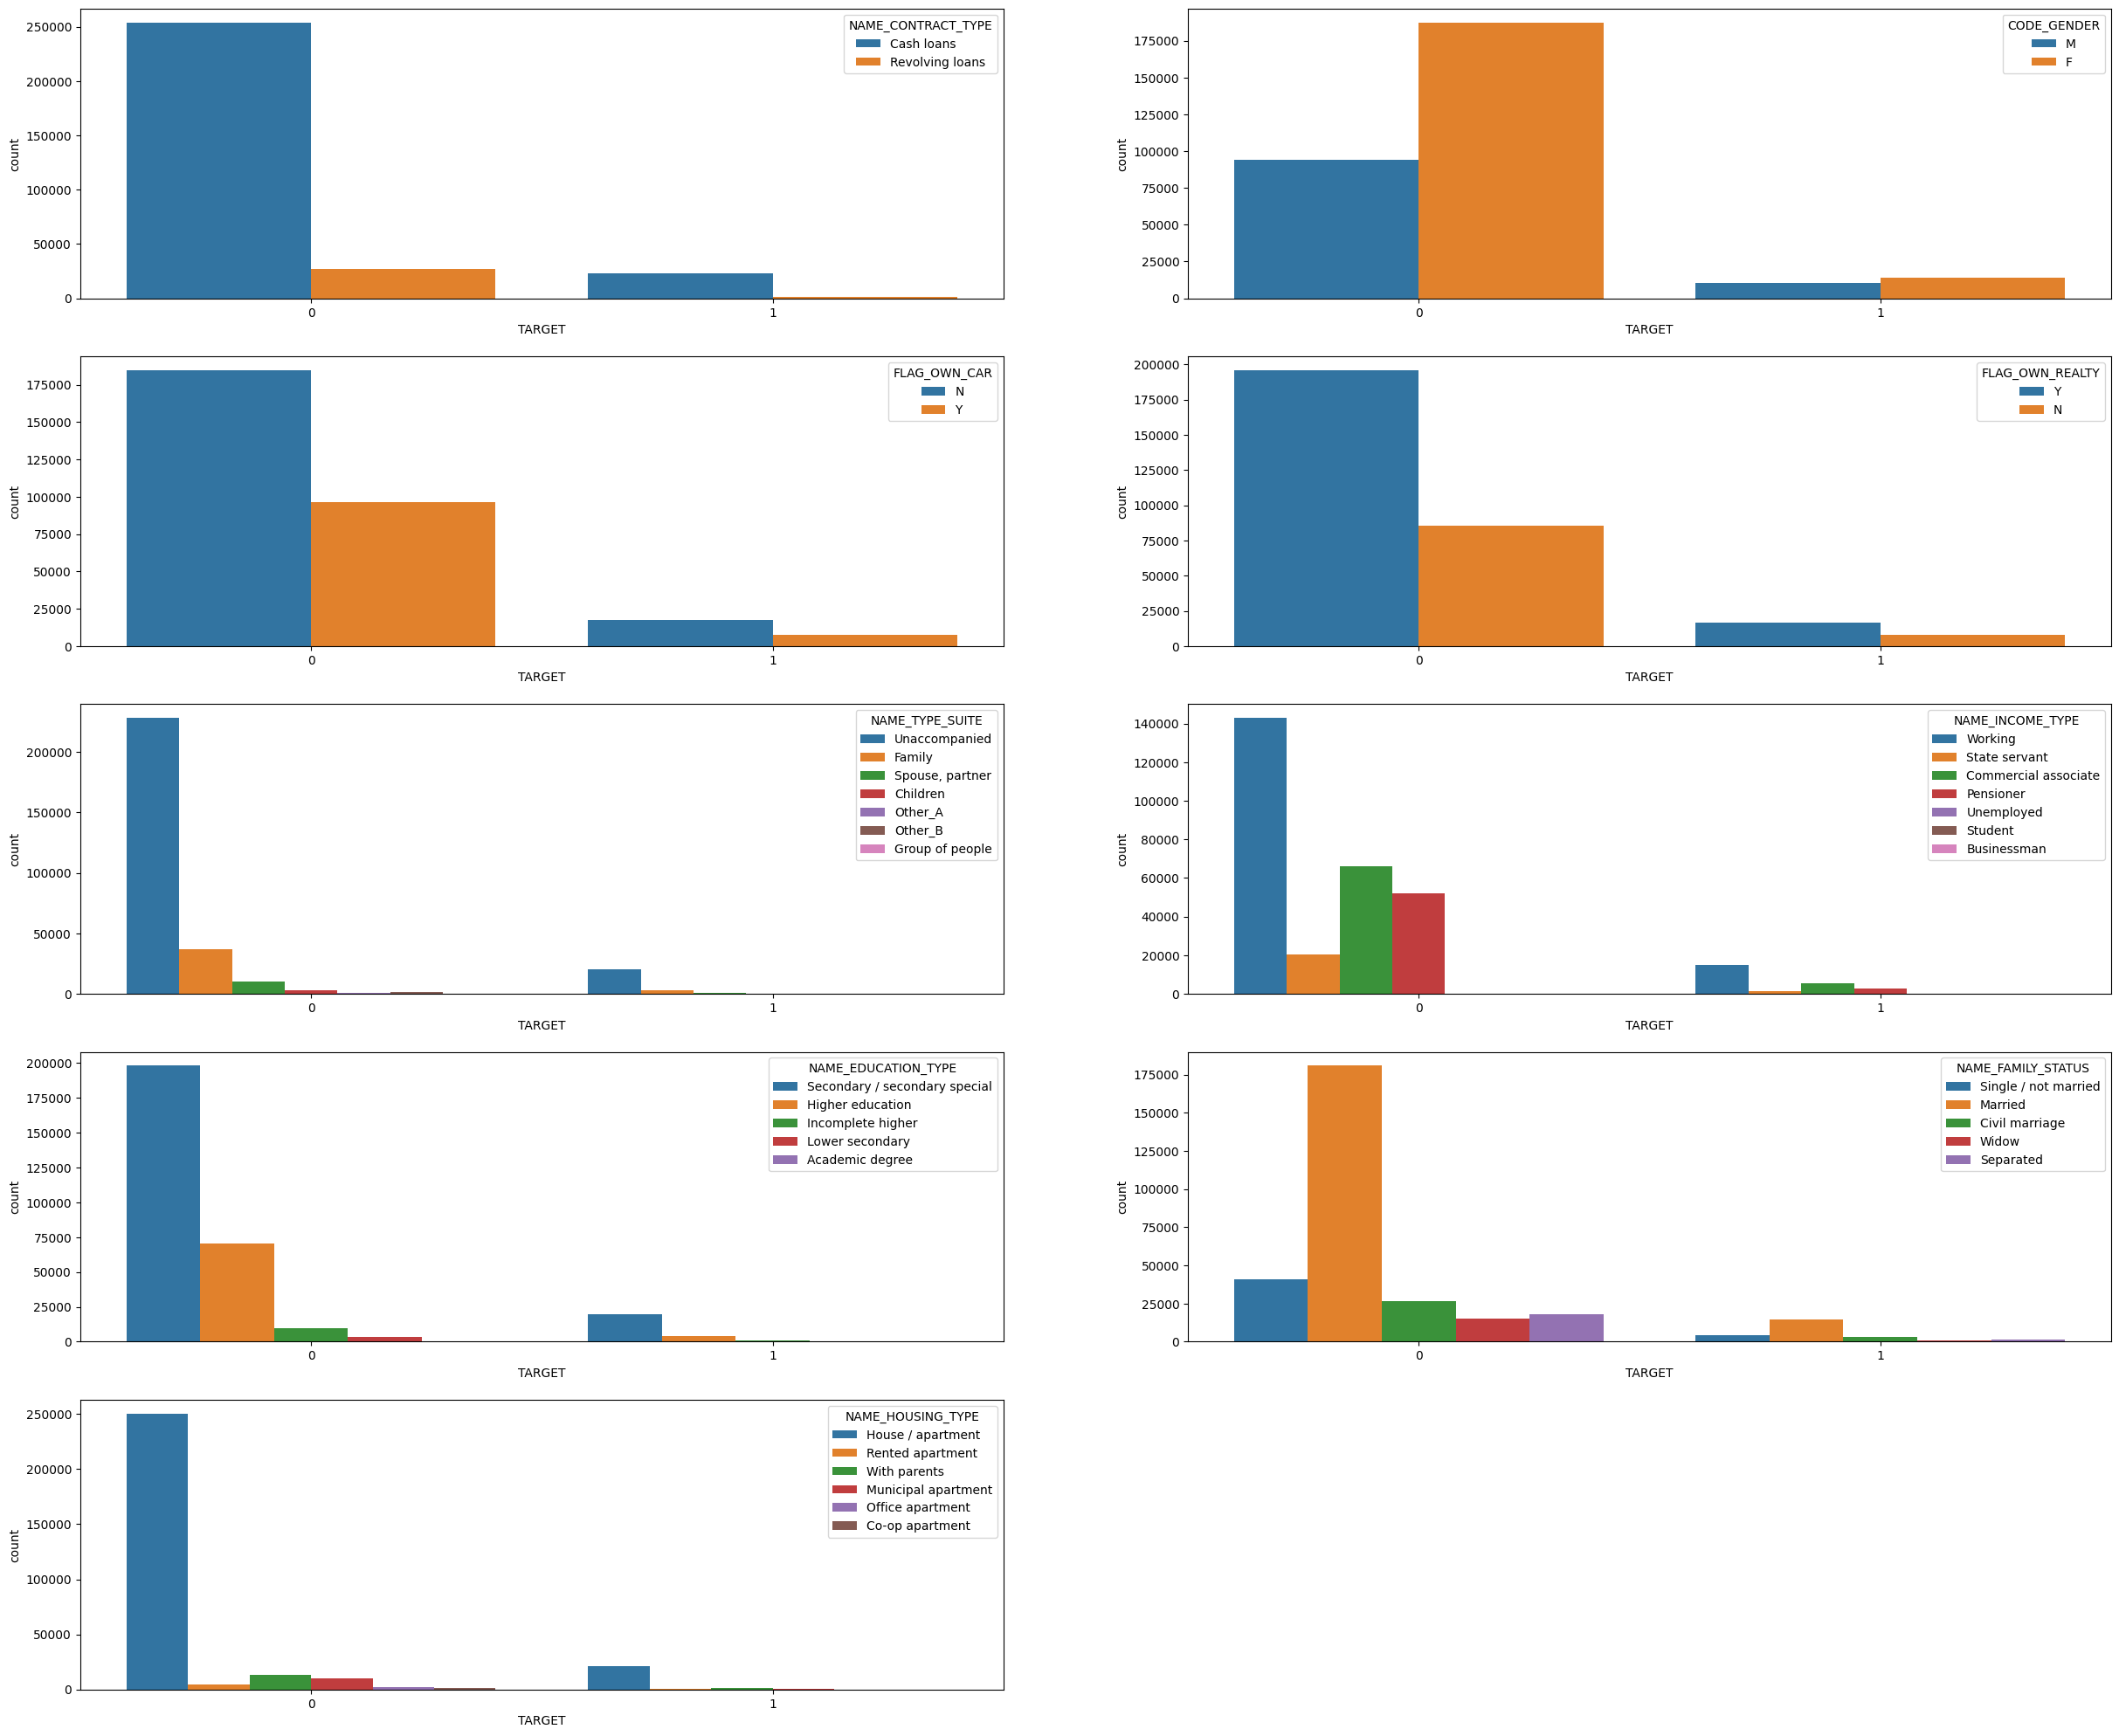

In [29]:
#Countplot TARGET Berdasarkan beberapa kategori
plt.figure(figsize=(30,25))

plt.subplot(5,2,1)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_CONTRACT_TYPE)

plt.subplot(5,2,2)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.CODE_GENDER)

plt.subplot(5,2,3)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.FLAG_OWN_CAR)

plt.subplot(5,2,4)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.FLAG_OWN_REALTY)

plt.subplot(5,2,5)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_TYPE_SUITE)

plt.subplot(5,2,6)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_INCOME_TYPE)

plt.subplot(5,2,7)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_EDUCATION_TYPE)

plt.subplot(5,2,8)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_FAMILY_STATUS)

plt.subplot(5,2,9)
sns.countplot(x=train_pakai.TARGET,hue=train_pakai.NAME_HOUSING_TYPE)

<ipython-input-30-b35edbb39841>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_pakai.corr(),cmap='Blues',annot=True)


<Axes: >

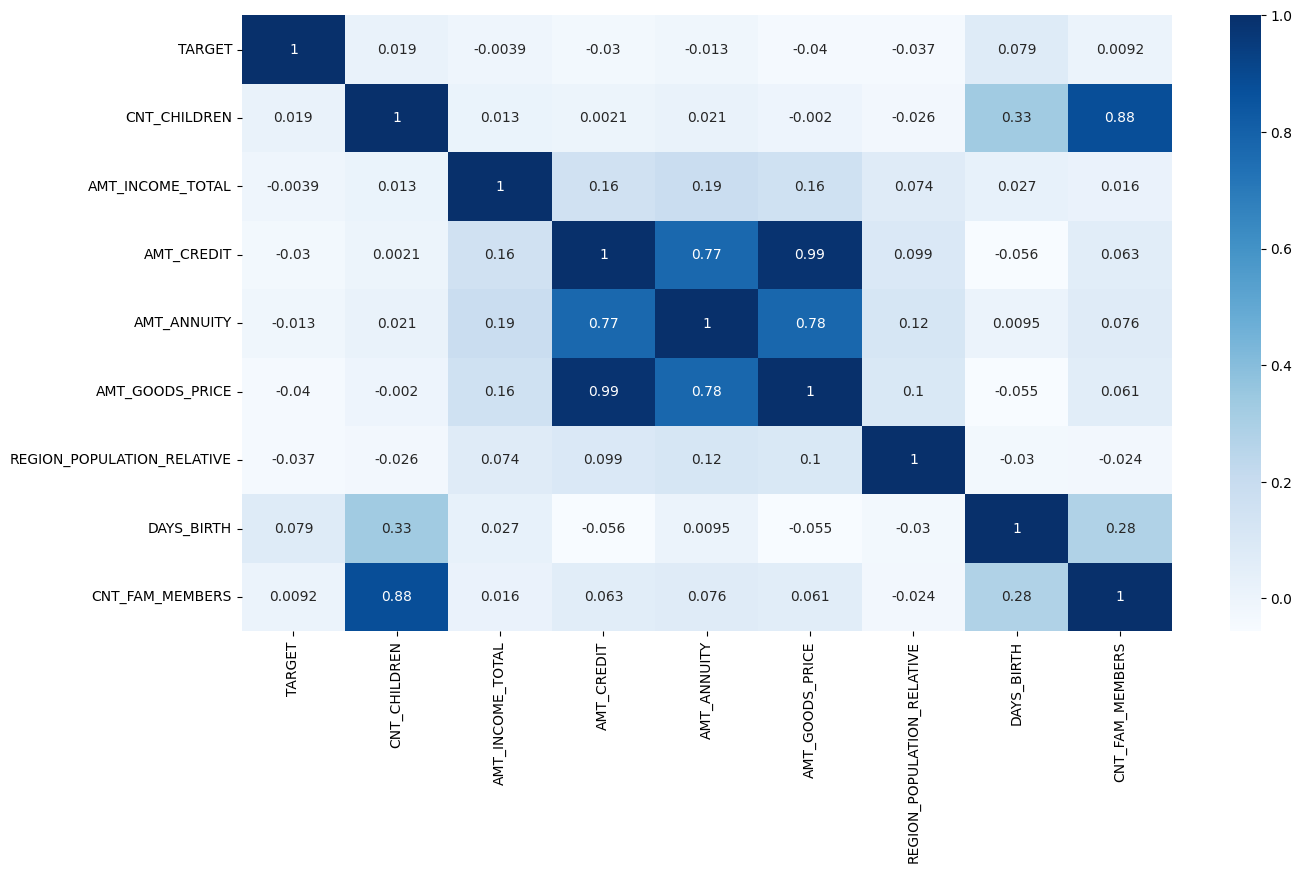

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(train_pakai.corr(),cmap='Blues',annot=True)

# Data Preprocessing

## Feature Engineering

In [31]:
AGE_TR=(train_pakai['DAYS_BIRTH']/-365).astype(int)
AGE_TS=(test_pakai['DAYS_BIRTH']/-365).astype(int)

In [32]:
train_pakai=train_pakai.assign(AGE=AGE_TR).drop('DAYS_BIRTH',axis=1)
train_pakai.head(3)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,1.0,25
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,2.0,45
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,1.0,52


In [33]:
test_pakai=test_pakai.assign(AGE=AGE_TS).drop('DAYS_BIRTH',axis=1)
test_pakai.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,2.0,52
1,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,2.0,49
3,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,4.0,38
4,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,3.0,35
5,Cash loans,F,Y,Y,0,270000.0,959688.0,34600.5,810000.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.025164,2.0,50


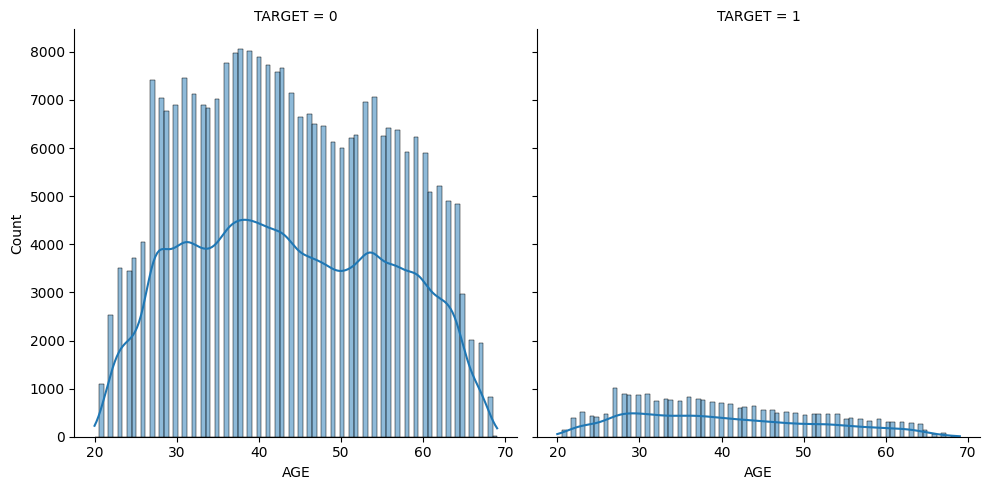

In [34]:
sns.displot(data=train_pakai, x="AGE", col='TARGET', kde=True)
plt.show()

In [35]:
data_age = train_pakai[['TARGET', 'AGE']]
data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))
data_age = (data_age.groupby(['AGE_GROUP']).mean()).sort_values('TARGET')
data_age

<ipython-input-35-3256e19da680>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_age['AGE_GROUP'] = pd.cut(data_age['AGE'], bins = np.linspace(20, 70, num=6))


,TARGET,AGE
AGE_GROUP,,
"(60.0, 70.0]",0.049304,63.468253
"(50.0, 60.0]",0.059313,55.403080
"(40.0, 50.0]",0.075530,45.245890
"(30.0, 40.0]",0.093087,35.610330
"(20.0, 30.0]",0.114349,26.691296


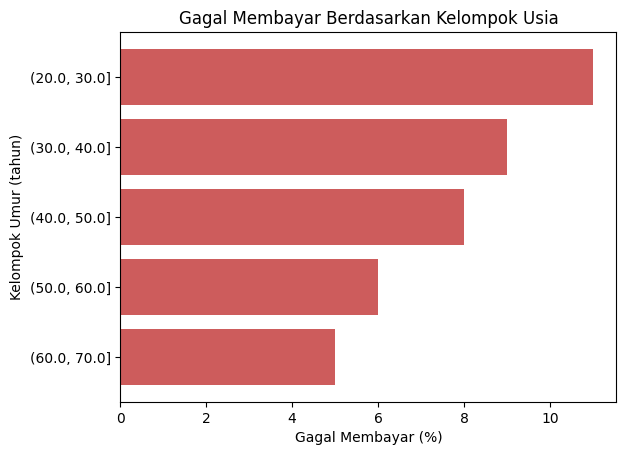

In [36]:
plt.barh(data_age.index.astype(str), round(100*data_age['TARGET']), color='indianred')

plt.ylabel('Kelompok Umur (tahun)')
plt.xlabel('Gagal Membayar (%)')
plt.title('Gagal Membayar Berdasarkan Kelompok Usia');
plt.show()

Informasi yang bisa diterapkan oleh bank adalah bahwa klien yang lebih muda memiliki kecenderungan yang lebih tinggi untuk gagal membayar pinjaman. Tingkat kegagalan pembayaran melebihi 10% untuk kelompok usia termuda, sementara di bawah 5% untuk kelompok usia tertua.

Berdasarkan informasi ini, bank dapat mengambil langkah-langkah pencegahan dengan memberikan panduan atau tips perencanaan keuangan kepada nasabah yang lebih muda. Tujuannya bukan untuk mendiskriminasi nasabah yang lebih muda, tetapi untuk membantu mereka membayar tepat waktu dengan memberikan saran dan dukungan tambahan.

## Feature Encoding

In [37]:
l = LabelEncoder()
for q in test_pakai.describe(include='object').columns:
    test_pakai[q]=l.fit_transform(test_pakai[q])
app_test.head(3)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


In [38]:
l = LabelEncoder()
for p in train_pakai.describe(include='object').columns:
    train_pakai[p]=l.fit_transform(train_pakai[p])
train_pakai.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,6,6,4,3,1,0.018801,1.0,25
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,1,3,1,1,1,0.003541,2.0,45
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,6,6,4,3,1,0.010032,1.0,52
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,6,6,4,0,1,0.008019,2.0,52
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,6,6,4,3,1,0.028663,1.0,54


# Modelling

## Train-Test Splitting

In [39]:
# Pembagian data latih dan data uji
from sklearn.model_selection import train_test_split

X = train_pakai.drop(columns = ['TARGET'])
y = train_pakai['TARGET']

# split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, # 70% training and 30% test
                                                    random_state=109)

In [40]:
X_train.shape

(214338, 17)

In [41]:
X_test.shape

(91860, 17)

In [42]:
y_train.shape

(214338,)

In [43]:
y_test.shape

(91860,)

## Imbalanced Dataset

In [44]:
y_train.value_counts()

0    197056
1     17282
Name: TARGET, dtype: int64

## Menyeimbangkan Dataset menggunakan oversampling (SMOTE)

In [45]:
! pip install SMOTE

In [46]:
from imblearn.over_sampling import SMOTE

# X_train, y_train = SMOTE(0.5).fit_resample(X_train,y_train)
smote = SMOTE(sampling_strategy=0.5)
X_train,y_train = smote.fit_resample(X_train,y_train)

   Labels  TARGET
0       0  197056
1       1   98528


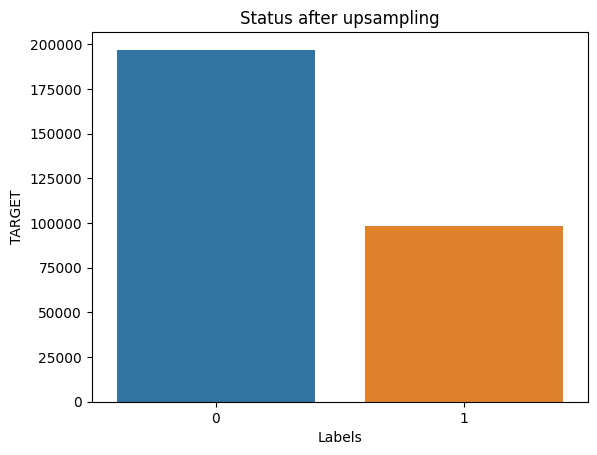

In [47]:
oversample_plot = y_train.value_counts().reset_index()
oversample_plot.columns = ['Labels','TARGET']
print(oversample_plot)
sns.barplot(x='Labels',y='TARGET',data=oversample_plot);
plt.title('Status after upsampling');

## Logistic Regression

In [48]:
clf3 = LogisticRegression(random_state=42)
param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l1', 'l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create the pipeline with the classifier
pipeline = Pipeline([('classifier', LogisticRegression())])

# Define the parameter grid with the solver and penalty options
param_grid = {
    'classifier__solver': ['liblinear', 'saga'],
    'classifier__penalty': ['l1'],
}

# Perform the grid search
gs_lr = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
gs_lr.fit(X_train, y_train)

# Get the best parameters
best_params = gs_lr.best_params_
print(best_params)

{'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}


In [50]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_lr.predict(X_test), y_test))
print("Test Precision:", precision_score(gs_lr.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_lr.predict(X_test), y_test))

Test Accuracy Score: 0.8292619203135205
Test Precision: 0.16463659483335563
Test Recall: 0.11524407383116275


In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_lr.predict(X_test)
lr_train_acc = accuracy_score(y_train, gs_lr.predict(X_train))
lr_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Logistic Regression is : 0.7351480459023493
Test accuracy of Logistic Regression is : 0.8292619203135205
[[74946  9443]
 [ 6241  1230]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     84389
           1       0.12      0.16      0.14      7471

    accuracy                           0.83     91860
   macro avg       0.52      0.53      0.52     91860
weighted avg       0.86      0.83      0.84     91860



## XGBoost Classifier

In [52]:
clf8 = XGBClassifier(random_state=42)
param8 = {}
param8['n_estimators'] = [10, 50, 100, 130]
param8['criterion'] = ['gini', 'entropy']
param8['max_depth'] = range(2, 10, 1)

In [53]:
params = [param8]
gs_xgbc = GridSearchCV(clf8, params, cv=3, n_jobs=-1, scoring='accuracy').fit(X_train, y_train)
gs_xgbc.best_params_

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [06:42:58] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "criterion" } are not used.

  warnings.warn(smsg, UserWarning)


{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 130}

In [54]:
# Test data performance
print("Test Accuracy Score:",accuracy_score(gs_xgbc.predict(X_test), y_test))
print("Test Precision:",precision_score(gs_xgbc.predict(X_test), y_test))
print("Test Recall:",recall_score(gs_xgbc.predict(X_test), y_test))

Test Accuracy Score: 0.9127694317439582
Test Precision: 0.021817695087672333
Test Recall: 0.18778801843317972


In [55]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = gs_xgbc.predict(X_test)
xgbc_train_acc = accuracy_score(y_train, gs_xgbc.predict(X_train))
xgbc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of XGBoost Classifier is : {xgbc_train_acc}")
print(f"Test accuracy of XGBoost Classifier is : {xgbc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of XGBoost Classifier is : 0.9369756143769622
Test accuracy of XGBoost Classifier is : 0.9127694317439582
[[83684   705]
 [ 7308   163]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     84389
           1       0.19      0.02      0.04      7471

    accuracy                           0.91     91860
   macro avg       0.55      0.51      0.50     91860
weighted avg       0.86      0.91      0.88     91860



## Perbandingan Performa Model

In [56]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression',
               'XGBoost Classifier',],
    'Score' : [lr_test_acc, xgbc_test_acc]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,XGBoost Classifier,0.912769
0,Logistic Regression,0.829262


In [57]:
import plotly.express as px

px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark',
       title = 'Models Comparison')

## Kesimpulan
Berdasarkan analisa yang dilakukan pada data home credit didapatkan bahwa :
Model terbaik adalah XGBoost Classifier
dengan akurasi : 0.917690

## Prediksi Data Testing

In [58]:
test_pakai

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,2.0,52
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,2.0,49
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,4.0,38
4,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,3.0,35
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,3,4,1,1,0.025164,2.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,6,6,4,4,1,0.002042,1.0,54
48740,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,6,1,4,1,1,0.035792,4.0,30
48741,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,6,1,4,1,1,0.026392,3.0,43
48742,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,1,1,1,1,1,0.018850,2.0,38


In [59]:
y_pred_proba_gs_xgbc_test = gs_xgbc.predict_proba(test_pakai)
y_pred_proba_gs_xgbc_test = y_pred_proba_gs_xgbc_test[:,-1]

In [60]:
y_pred_proba_gs_xgbc_test.shape

(47809,)

In [61]:
test_pakai.shape
test_pakai

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,CNT_FAM_MEMBERS,AGE
0,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,6,6,1,1,1,0.018850,2.0,52
1,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,6,6,4,1,1,0.035792,2.0,49
3,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,6,6,4,1,1,0.026392,4.0,38
4,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,6,6,4,1,1,0.010032,3.0,35
5,0,0,1,1,0,270000.0,959688.0,34600.5,810000.0,6,3,4,1,1,0.025164,2.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,0,0,0,1,0,121500.0,412560.0,17473.5,270000.0,6,6,4,4,1,0.002042,1.0,54
48740,0,0,0,0,2,157500.0,622413.0,31909.5,495000.0,6,1,4,1,1,0.035792,4.0,30
48741,0,0,1,1,1,202500.0,315000.0,33205.5,315000.0,6,1,4,1,1,0.026392,3.0,43
48742,0,1,0,0,0,225000.0,450000.0,25128.0,450000.0,1,1,1,1,1,0.018850,2.0,38


In [62]:
y_prediksi_test=pd.DataFrame(y_pred_proba_gs_xgbc_test)
y_prediksi_test = y_prediksi_test.rename(columns={0: 'TARGET'})
y_prediksi_test.insert(0, 'SK_ID_CURR', app_test['SK_ID_CURR'])

In [63]:
y_prediksi_test

,SK_ID_CURR,TARGET
0,100001,0.023119
1,100005,0.081672
2,100013,0.053429
3,100028,0.076439
4,100038,0.095524
...,...,...
47804,449412,0.089240
47805,449424,0.109944
47806,449427,0.004043
47807,449462,0.142526


In [64]:
y_prediksi_test.to_csv("/content/drive/MyDrive/home-credit-default-risk/Submission.csv", index=False)